
2nd run 
take the raw data and remove image sets with not enough cells detected 

start with a min of 15 nucleii

remove E26_NIC2_53

remove any rows with <15nuc

try to do the same process with the fist data set to add it to 2,3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 #read the csv file into a dataframe'
df = pd.read_csv('JMpipelineV6_04220207Image.csv')
df

,Count_Nuclei,Count_RO_PositiveNuclei,Count_h2AX,FileName_DAPI,FileName_Green,Group,ImageNumber,Math_PercentPositiveNuclei,Mean_Nuclei_AreaShape_Area,Mean_Nuclei_AreaShape_Center_X,...,Mean_h2AX_Mean_Nuclei_AreaShape_MedianRadius,Mean_h2AX_Mean_Nuclei_AreaShape_MinFeretDiameter,Mean_h2AX_Mean_Nuclei_AreaShape_MinorAxisLength,Mean_h2AX_Mean_Nuclei_AreaShape_Orientation,Mean_h2AX_Mean_Nuclei_AreaShape_Perimeter,Mean_h2AX_Mean_Nuclei_AreaShape_Solidity,Mean_h2AX_Mean_Nuclei_Location_Center_X,Mean_h2AX_Mean_Nuclei_Location_Center_Y,Mean_h2AX_Mean_Nuclei_Location_Center_Z,Mean_h2AX_Mean_Nuclei_Number_Object_Number
0,85,20,130,CSE_5B_74_c1.tif,CSE_5B_74_c0.tif,CSE,1,23.529412,2323.011765,773.470588,...,7.994622,46.824037,46.940902,-35.479833,212.269300,0.955859,711.309374,532.216723,0,44.550000
1,76,19,149,CSE_5B_75_c1.tif,CSE_5B_75_c0.tif,CSE,2,25.000000,2420.289474,742.434211,...,8.079331,48.777488,49.190027,-19.057108,217.128632,0.956019,866.491149,469.159900,0,34.421053
2,68,17,179,CSE_5B_76_c1.tif,CSE_5B_76_c0.tif,CSE,3,25.000000,2795.705882,772.691176,...,9.133352,49.771266,50.581981,-47.616923,229.399059,0.970854,865.658359,547.649486,0,35.588235
3,60,18,146,CSE_5B_77_c1.tif,CSE_5B_77_c0.tif,CSE,4,30.000000,2624.433333,718.500000,...,8.081635,43.463653,44.655614,-16.278801,214.215222,0.966192,758.001636,546.344099,0,28.277778
4,74,21,90,CSE_5B_78_c1.tif,CSE_5B_78_c0.tif,CSE,5,28.378378,2347.027027,817.662162,...,8.113037,47.134167,47.348220,-13.654593,211.370857,0.956950,889.666950,397.935124,0,28.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,49,11,44,Fifty_4C_29_c1.tif,Fifty_4C_29_c0.tif,50mg,131,22.448980,1920.265306,652.469388,...,7.705320,44.655312,45.319332,18.369071,184.788364,0.968213,782.198427,434.324176,0,18.272727
131,36,10,80,Fifty_4C_30_c1.tif,Fifty_4C_30_c0.tif,50mg,132,27.777778,2223.944444,619.972222,...,8.344922,47.478705,47.795371,-6.497001,212.888200,0.965750,730.377636,538.935312,0,17.700000
132,49,2,7,Fifty_4C_31_c1.tif,Fifty_4C_31_c0.tif,50mg,133,4.081633,1985.959184,595.897959,...,8.531129,52.334524,52.076598,-28.665248,209.878000,0.970461,802.584611,419.582401,0,16.000000
133,35,10,44,Fifty_4C_32_c1.tif,Fifty_4C_32_c0.tif,50mg,134,28.571429,2274.200000,649.314286,...,7.625256,43.619008,44.624948,17.859676,183.293400,0.971819,488.587647,508.099073,0,16.500000


In [3]:
list(df.columns)

['Count_Nuclei',
 'Count_RO_PositiveNuclei',
 'Count_h2AX',
 'FileName_DAPI',
 'FileName_Green',
 'Group',
 'ImageNumber',
 'Math_PercentPositiveNuclei',
 'Mean_Nuclei_AreaShape_Area',
 'Mean_Nuclei_AreaShape_Center_X',
 'Mean_Nuclei_AreaShape_Center_Y',
 'Mean_Nuclei_AreaShape_Center_Z',
 'Mean_Nuclei_AreaShape_Compactness',
 'Mean_Nuclei_AreaShape_Eccentricity',
 'Mean_Nuclei_AreaShape_EulerNumber',
 'Mean_Nuclei_AreaShape_Extent',
 'Mean_Nuclei_AreaShape_FormFactor',
 'Mean_Nuclei_AreaShape_MajorAxisLength',
 'Mean_Nuclei_AreaShape_MaxFeretDiameter',
 'Mean_Nuclei_AreaShape_MaximumRadius',
 'Mean_Nuclei_AreaShape_MeanRadius',
 'Mean_Nuclei_AreaShape_MedianRadius',
 'Mean_Nuclei_AreaShape_MinFeretDiameter',
 'Mean_Nuclei_AreaShape_MinorAxisLength',
 'Mean_Nuclei_AreaShape_Orientation',
 'Mean_Nuclei_AreaShape_Perimeter',
 'Mean_Nuclei_AreaShape_Solidity',
 'Mean_Nuclei_Children_RO_PositiveNuclei_Count',
 'Mean_Nuclei_Intensity_IntegratedIntensityEdge_FilteredMaskedGreen',
 'Mean_Nucl

In [4]:
df.describe()

,Count_Nuclei,Count_RO_PositiveNuclei,Count_h2AX,ImageNumber,Math_PercentPositiveNuclei,Mean_Nuclei_AreaShape_Area,Mean_Nuclei_AreaShape_Center_X,Mean_Nuclei_AreaShape_Center_Y,Mean_Nuclei_AreaShape_Center_Z,Mean_Nuclei_AreaShape_Compactness,...,Mean_h2AX_Mean_Nuclei_AreaShape_MedianRadius,Mean_h2AX_Mean_Nuclei_AreaShape_MinFeretDiameter,Mean_h2AX_Mean_Nuclei_AreaShape_MinorAxisLength,Mean_h2AX_Mean_Nuclei_AreaShape_Orientation,Mean_h2AX_Mean_Nuclei_AreaShape_Perimeter,Mean_h2AX_Mean_Nuclei_AreaShape_Solidity,Mean_h2AX_Mean_Nuclei_Location_Center_X,Mean_h2AX_Mean_Nuclei_Location_Center_Y,Mean_h2AX_Mean_Nuclei_Location_Center_Z,Mean_h2AX_Mean_Nuclei_Number_Object_Number
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.0,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.0,135.000000
mean,58.185185,17.637037,109.400000,68.000000,33.669770,2146.439717,692.849151,515.577495,1.0,1.151498,...,7.630570,43.423137,44.031771,1.722162,193.758381,0.963424,695.243754,510.847763,0.0,29.390409
std,23.301139,7.966916,85.759052,39.115214,18.026920,243.594625,65.375966,51.330000,0.0,0.035505,...,0.627229,4.203696,4.076583,20.477219,17.017448,0.007849,118.520383,73.665695,0.0,12.225614
min,22.000000,2.000000,7.000000,1.000000,4.081633,1522.585366,505.468085,324.480000,1.0,1.094501,...,6.109433,33.189039,34.300300,-47.616923,152.489714,0.933595,163.494934,321.358701,0.0,9.000000
25%,41.000000,12.000000,43.500000,34.500000,22.641509,1971.258584,650.547812,486.637500,1.0,1.122589,...,7.180437,40.294800,40.918944,-12.996080,181.711025,0.961416,617.684331,460.411581,0.0,20.000000
50%,53.000000,16.000000,78.000000,68.000000,29.787234,2126.654545,701.727273,516.600000,1.0,1.148965,...,7.595276,43.463653,43.927696,1.927556,192.005059,0.965063,702.606860,520.226359,0.0,25.923077
75%,76.000000,21.000000,149.000000,101.500000,38.827751,2316.862500,737.798165,546.996112,1.0,1.172592,...,8.085672,46.601643,47.111461,16.507344,206.798394,0.968557,774.620221,561.035493,0.0,37.718750
max,120.000000,56.000000,417.000000,135.000000,84.210526,2795.705882,872.609375,645.887097,1.0,1.295375,...,9.133352,52.911947,53.141325,55.292892,239.990235,0.974355,921.364053,722.047978,0.0,60.700000


# Check if the number of nuclei and foci are within normal limits

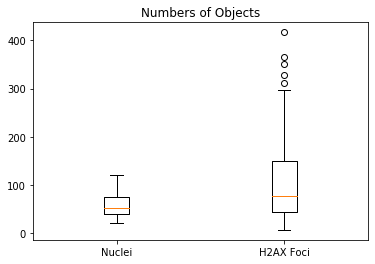

In [5]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
nuclei_count_bxplt = df.loc[(df.Count_Nuclei.notnull()) ,'Count_Nuclei']
h2ax_count_bxplt = df.loc[(df.Count_h2AX.notnull()),'Count_h2AX']
ax.boxplot([nuclei_count_bxplt, h2ax_count_bxplt])
ax.set(xticklabels=['Nuclei', 'H2AX Foci'], title="Numbers of Objects")
plt.show()

In [6]:
#groups
df_groups = df.groupby('Group')

df_controls = df_groups.get_group('Control')
df_PGVG = df_groups.get_group('PGVG')
df_Nic1 = df_groups.get_group('12.5mg')
df_Nic2 = df_groups.get_group('25mg')
df_Nic3 = df_groups.get_group('50mg')
df_CSE = df_groups.get_group('CSE')

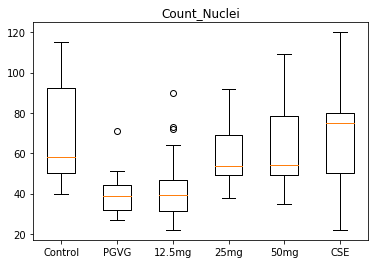

In [7]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.Count_Nuclei.notnull()) ,'Count_Nuclei']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.Count_Nuclei.notnull()) ,'Count_Nuclei']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.Count_Nuclei.notnull()) ,'Count_Nuclei']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.Count_Nuclei.notnull())  ,'Count_Nuclei']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.Count_Nuclei.notnull())  ,'Count_Nuclei']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.Count_Nuclei.notnull())  ,'Count_Nuclei']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Count_Nuclei")
plt.show()

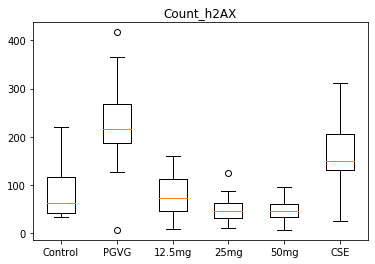

In [8]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.Count_h2AX.notnull()) ,'Count_h2AX']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.Count_h2AX.notnull()) ,'Count_h2AX']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.Count_h2AX.notnull()) ,'Count_h2AX']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.Count_h2AX.notnull())  ,'Count_h2AX']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.Count_h2AX.notnull())  ,'Count_h2AX']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.Count_h2AX.notnull())  ,'Count_h2AX']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Count_h2AX")
plt.show()

Looks like there might be one major outlier in both

# Make new features

In [9]:
df['PercentPosNuc'] = df['Count_RO_PositiveNuclei'] / df['Count_Nuclei']

df['Foci_nuc_ratio'] = df['Count_h2AX'] / df['Count_Nuclei']



# Make Groups

In [10]:
df_groups = df.groupby('Group')

In [11]:
df_controls = df_groups.get_group('Control')
df_controls.head()

,Count_Nuclei,Count_RO_PositiveNuclei,Count_h2AX,FileName_DAPI,FileName_Green,Group,ImageNumber,Math_PercentPositiveNuclei,Mean_Nuclei_AreaShape_Area,Mean_Nuclei_AreaShape_Center_X,...,Mean_h2AX_Mean_Nuclei_AreaShape_MinorAxisLength,Mean_h2AX_Mean_Nuclei_AreaShape_Orientation,Mean_h2AX_Mean_Nuclei_AreaShape_Perimeter,Mean_h2AX_Mean_Nuclei_AreaShape_Solidity,Mean_h2AX_Mean_Nuclei_Location_Center_X,Mean_h2AX_Mean_Nuclei_Location_Center_Y,Mean_h2AX_Mean_Nuclei_Location_Center_Z,Mean_h2AX_Mean_Nuclei_Number_Object_Number,PercentPosNuc,Foci_nuc_ratio
26,40,11,70,Control_6C_51_c1.tif,Control_6C_51_c0.tif,Control,27,27.500000,2537.675000,713.550000,...,50.276559,0.242227,212.363818,0.974355,679.303899,477.036519,0,18.818182,0.275000,1.750000
27,68,21,134,Control_6C_52_c1.tif,Control_6C_52_c0.tif,Control,28,30.882353,2126.000000,584.352941,...,49.682507,14.882831,203.077905,0.964558,617.482228,444.457566,0,34.952381,0.308824,1.970588
28,55,23,220,Control_6C_53_c1.tif,Control_6C_53_c0.tif,Control,29,41.818182,2171.436364,739.909091,...,44.324251,19.282458,193.348870,0.964099,821.585918,473.335264,0,24.956522,0.418182,4.000000
29,58,22,149,Control_6C_54_c1.tif,Control_6C_54_c0.tif,Control,30,37.931034,2011.655172,685.706897,...,45.821882,5.538021,190.540546,0.968580,656.616484,528.342570,0,29.272727,0.379310,2.568966
30,76,16,34,Control_6C_55_c1.tif,Control_6C_55_c0.tif,Control,31,21.052632,2051.105263,724.815789,...,45.374922,1.240731,190.189000,0.962690,710.560232,446.107261,0,36.750000,0.210526,0.447368


In [12]:
df_PGVG = df_groups.get_group('PGVG')
df_Nic1 = df_groups.get_group('12.5mg')
df_Nic2 = df_groups.get_group('25mg')
df_Nic3 = df_groups.get_group('50mg')
df_CSE = df_groups.get_group('CSE')

In [13]:
df_groups = df.groupby('Group')

df_controls = df_groups.get_group('Control')
df_PGVG = df_groups.get_group('PGVG')
df_Nic1 = df_groups.get_group('12.5mg')
df_Nic2 = df_groups.get_group('25mg')
df_Nic3 = df_groups.get_group('50mg')
df_CSE = df_groups.get_group('CSE')

# Look at the distribution of datapoints 

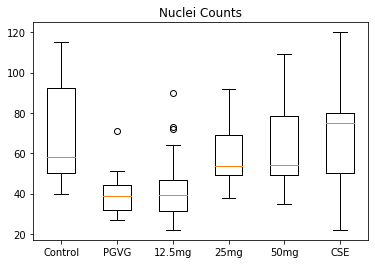

In [14]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.Count_Nuclei.notnull()) ,'Count_Nuclei']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.Count_Nuclei.notnull()) ,'Count_Nuclei']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.Count_Nuclei.notnull()) ,'Count_Nuclei']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.Count_Nuclei.notnull())  ,'Count_Nuclei']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.Count_Nuclei.notnull())  ,'Count_Nuclei']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.Count_Nuclei.notnull())  ,'Count_Nuclei']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Nuclei Counts")
plt.show()

In [15]:
df_PGVG['Count_Nuclei'].nlargest()

67    71
51    51
49    47
58    47
50    46
Name: Count_Nuclei, dtype: int64

In [16]:
df['Count_Nuclei'].nlargest()

8      120
43     115
7      114
22     109
115    109
Name: Count_Nuclei, dtype: int64

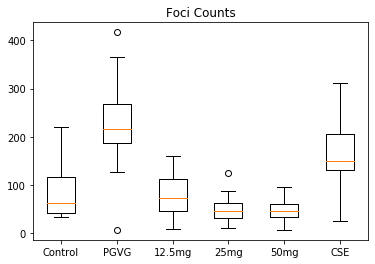

In [17]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.Count_h2AX.notnull()) ,'Count_h2AX']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.Count_h2AX.notnull()) ,'Count_h2AX']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.Count_h2AX.notnull()) ,'Count_h2AX']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.Count_h2AX.notnull())  ,'Count_h2AX']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.Count_h2AX.notnull())  ,'Count_h2AX']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.Count_h2AX.notnull())  ,'Count_h2AX']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Foci Counts")
plt.show()

In [18]:
df['Count_h2AX'].nlargest()

67    417
63    366
49    352
68    328
11    312
Name: Count_h2AX, dtype: int64

Check the percent pos coumn I calculated

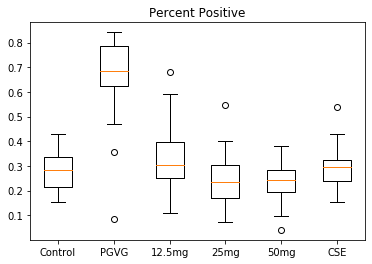

In [19]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.PercentPosNuc.notnull()) ,'PercentPosNuc']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.PercentPosNuc.notnull()) ,'PercentPosNuc']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.PercentPosNuc.notnull()) ,'PercentPosNuc']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.PercentPosNuc.notnull())  ,'PercentPosNuc']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.PercentPosNuc.notnull())  ,'PercentPosNuc']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.PercentPosNuc.notnull())  ,'PercentPosNuc']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Percent Positive")
plt.show()

# Make sure its the same as the CP calculated percent pos 

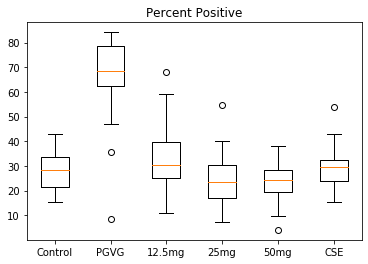

In [20]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.Math_PercentPositiveNuclei.notnull()) ,'Math_PercentPositiveNuclei']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.Math_PercentPositiveNuclei.notnull()) ,'Math_PercentPositiveNuclei']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.Math_PercentPositiveNuclei.notnull()) ,'Math_PercentPositiveNuclei']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.Math_PercentPositiveNuclei.notnull())  ,'Math_PercentPositiveNuclei']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.Math_PercentPositiveNuclei.notnull())  ,'Math_PercentPositiveNuclei']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.Math_PercentPositiveNuclei.notnull())  ,'Math_PercentPositiveNuclei']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Percent Positive")
plt.show()



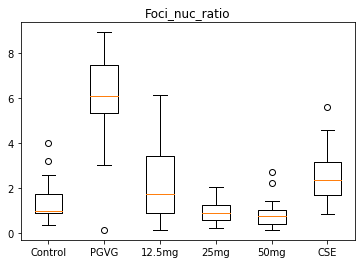

In [21]:
#Foci_nuc_ratio

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.Foci_nuc_ratio.notnull()) ,'Foci_nuc_ratio']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.Foci_nuc_ratio.notnull()) ,'Foci_nuc_ratio']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.Foci_nuc_ratio.notnull()) ,'Foci_nuc_ratio']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.Foci_nuc_ratio.notnull())  ,'Foci_nuc_ratio']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.Foci_nuc_ratio.notnull())  ,'Foci_nuc_ratio']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.Foci_nuc_ratio.notnull())  ,'Foci_nuc_ratio']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Foci_nuc_ratio")
plt.show()




# Look at Foci Intensities across groups_Means

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls..notnull()) ,'']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG..notnull()) ,'']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1..notnull()) ,'']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2..notnull())  ,'']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3..notnull())  ,'']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE..notnull())  ,'']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="")
plt.show()

In [ ]:
#Mean_h2AX_Intensity_MeanIntensity_Green
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.Mean_h2AX_Intensity_MeanIntensity_Green.notnull()) ,'Mean_h2AX_Intensity_MeanIntensity_Green']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.Mean_h2AX_Intensity_MeanIntensity_Green.notnull()) ,'Mean_h2AX_Intensity_MeanIntensity_Green']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.Mean_h2AX_Intensity_MeanIntensity_Green.notnull()) ,'Mean_h2AX_Intensity_MeanIntensity_Green']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.Mean_h2AX_Intensity_MeanIntensity_Green.notnull())  ,'Mean_h2AX_Intensity_MeanIntensity_Green']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.Mean_h2AX_Intensity_MeanIntensity_Green.notnull())  ,'Mean_h2AX_Intensity_MeanIntensity_Green']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.Mean_h2AX_Intensity_MeanIntensity_Green.notnull())  ,'Mean_h2AX_Intensity_MeanIntensity_Green']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Mean_h2AX_Intensity_MeanIntensity_Green")
plt.show()

In [ ]:
#'Mean_h2AX_Intensity_IntegratedIntensity_Green'
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.Mean_h2AX_Intensity_IntegratedIntensity_Green.notnull()) ,'Mean_h2AX_Intensity_IntegratedIntensity_Green']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.Mean_h2AX_Intensity_IntegratedIntensity_Green.notnull()) ,'Mean_h2AX_Intensity_IntegratedIntensity_Green']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.Mean_h2AX_Intensity_IntegratedIntensity_Green.notnull()) ,'Mean_h2AX_Intensity_IntegratedIntensity_Green']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.Mean_h2AX_Intensity_IntegratedIntensity_Green.notnull())  ,'Mean_h2AX_Intensity_IntegratedIntensity_Green']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.Mean_h2AX_Intensity_IntegratedIntensity_Green.notnull())  ,'Mean_h2AX_Intensity_IntegratedIntensity_Green']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.Mean_h2AX_Intensity_IntegratedIntensity_Green.notnull())  ,'Mean_h2AX_Intensity_IntegratedIntensity_Green']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Integrated Density")
plt.show()

In [ ]:
#'Mean_h2AX_Intensity_IntegratedIntensityEdge_Green'
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.Mean_h2AX_Intensity_IntegratedIntensityEdge_Green.notnull()) ,'Mean_h2AX_Intensity_IntegratedIntensityEdge_Green']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.Mean_h2AX_Intensity_IntegratedIntensityEdge_Green.notnull()) ,'Mean_h2AX_Intensity_IntegratedIntensityEdge_Green']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.Mean_h2AX_Intensity_IntegratedIntensityEdge_Green.notnull()) ,'Mean_h2AX_Intensity_IntegratedIntensityEdge_Green']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.Mean_h2AX_Intensity_IntegratedIntensityEdge_Green.notnull())  ,'Mean_h2AX_Intensity_IntegratedIntensityEdge_Green']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.Mean_h2AX_Intensity_IntegratedIntensityEdge_Green.notnull())  ,'Mean_h2AX_Intensity_IntegratedIntensityEdge_Green']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.Mean_h2AX_Intensity_IntegratedIntensity_Green.notnull())  ,'Mean_h2AX_Intensity_IntegratedIntensity_Green']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Integrated DensityEdge")
plt.show()

In [ ]:
#Mean_h2AX_Intensity_MADIntensity_Green

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.Mean_h2AX_Intensity_MADIntensity_Green.notnull()) ,'Mean_h2AX_Intensity_MADIntensity_Green']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.Mean_h2AX_Intensity_MADIntensity_Green.notnull()) ,'Mean_h2AX_Intensity_MADIntensity_Green']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.Mean_h2AX_Intensity_MADIntensity_Green.notnull()) ,'Mean_h2AX_Intensity_MADIntensity_Green']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.Mean_h2AX_Intensity_MADIntensity_Green.notnull())  ,'Mean_h2AX_Intensity_MADIntensity_Green']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.Mean_h2AX_Intensity_MADIntensity_Green.notnull())  ,'Mean_h2AX_Intensity_MADIntensity_Green']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.Mean_h2AX_Intensity_MADIntensity_Green.notnull())  ,'Mean_h2AX_Intensity_MADIntensity_Green']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Mean_h2AX_Intensity_MADIntensity_Green")
plt.show()

In [ ]:
# Look at Foci Intensities across groups_Median
#Median_h2AX_Intensity_MeanIntensityEdge_Green

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.Median_h2AX_Intensity_MeanIntensityEdge_Green.notnull()) ,'Median_h2AX_Intensity_MeanIntensityEdge_Green']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.Median_h2AX_Intensity_MeanIntensityEdge_Green.notnull()) ,'Median_h2AX_Intensity_MeanIntensityEdge_Green']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.Median_h2AX_Intensity_MeanIntensityEdge_Green.notnull()) ,'Median_h2AX_Intensity_MeanIntensityEdge_Green']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.Median_h2AX_Intensity_MeanIntensityEdge_Green.notnull())  ,'Median_h2AX_Intensity_MeanIntensityEdge_Green']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.Median_h2AX_Intensity_MeanIntensityEdge_Green.notnull())  ,'Median_h2AX_Intensity_MeanIntensityEdge_Green']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.Median_h2AX_Intensity_MeanIntensityEdge_Green.notnull())  ,'Median_h2AX_Intensity_MeanIntensityEdge_Green']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Median_h2AX_Intensity_MeanIntensityEdge_Green")
plt.show()

# Loook at shape of foci across groups

In [ ]:
#Mean_h2AX_AreaShape_MeanRadius

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.Mean_h2AX_AreaShape_MeanRadius.notnull()) ,'Mean_h2AX_AreaShape_MeanRadius']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.Mean_h2AX_AreaShape_MeanRadius.notnull()) ,'Mean_h2AX_AreaShape_MeanRadius']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.Mean_h2AX_AreaShape_MeanRadius.notnull()) ,'Mean_h2AX_AreaShape_MeanRadius']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.Mean_h2AX_AreaShape_MeanRadius.notnull())  ,'Mean_h2AX_AreaShape_MeanRadius']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.Mean_h2AX_AreaShape_MeanRadius.notnull())  ,'Mean_h2AX_AreaShape_MeanRadius']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.Mean_h2AX_AreaShape_MeanRadius.notnull())  ,'Mean_h2AX_AreaShape_MeanRadius']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Mean_h2AX_AreaShape_MeanRadius")
plt.show()

In [ ]:
df['Mean_h2AX_AreaShape_MeanRadius'].describe()

In [ ]:
#Mean_h2AX_Classify_hi
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.Mean_h2AX_Classify_hi.notnull()) ,'Mean_h2AX_Classify_hi']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.Mean_h2AX_Classify_hi.notnull()) ,'Mean_h2AX_Classify_hi']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.Mean_h2AX_Classify_hi.notnull()) ,'Mean_h2AX_Classify_hi']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.Mean_h2AX_Classify_hi.notnull())  ,'Mean_h2AX_Classify_hi']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.Mean_h2AX_Classify_hi.notnull())  ,'Mean_h2AX_Classify_hi']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.Mean_h2AX_Classify_hi.notnull())  ,'Mean_h2AX_Classify_hi']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Mean_h2AX_Classify_hi")
plt.show()

In [ ]:
#Mean_h2AX_Classify_low
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls.loc[(df_controls.Mean_h2AX_Classify_low.notnull()) ,'Mean_h2AX_Classify_low']
PGVG_nuclei_count_bxplt = df_PGVG.loc[(df_PGVG.Mean_h2AX_Classify_low.notnull()) ,'Mean_h2AX_Classify_low']
Nic1_nuclei_count_bxplt = df_Nic1.loc[(df_Nic1.Mean_h2AX_Classify_low.notnull()) ,'Mean_h2AX_Classify_low']
Nic2_nuclei_count_bxplt = df_Nic2.loc[(df_Nic2.Mean_h2AX_Classify_low.notnull())  ,'Mean_h2AX_Classify_low']
Nic3_nuclei_count_bxplt = df_Nic3.loc[(df_Nic3.Mean_h2AX_Classify_low.notnull())  ,'Mean_h2AX_Classify_low']
CSE_nuclei_count_bxplt = df_CSE.loc[(df_CSE.Mean_h2AX_Classify_hi.notnull())  ,'Mean_h2AX_Classify_low']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Mean_h2AX_Classify_low")
plt.show()

# Look Into control data spread 

In [22]:
Control_PctPos = df.loc[df['Group'] == 'Control', 'PercentPosNuc']

In [23]:
Control_PctPos.describe()

count    23.000000
mean      0.282223
std       0.079000
min       0.152381
25%       0.216061
50%       0.282609
75%       0.336478
max       0.428571
Name: PercentPosNuc, dtype: float64

In [24]:
df.loc[df['Group'] == 'Control', 'PercentPosNuc'].max()

0.42857142857142855

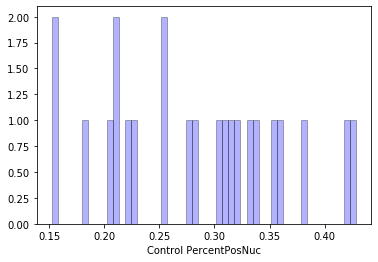

In [25]:
#histogram of Control Data 
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
ax.hist(df_controls['PercentPosNuc'],  color='blue', alpha=.3, edgecolor='black', bins=50)
ax.set(xlabel="Control PercentPosNuc")

plt.show()

In [26]:
df_controls['PercentPosNuc'].nlargest() #Here we see the max 10 values

47    0.428571
28    0.418182
29    0.379310
34    0.360000
37    0.351852
Name: PercentPosNuc, dtype: float64

# Outlier removal
df_controls_01[df_controls_01.between(df_controls_01.quantile(.15), df_controls_01.quantile(.85))]

In [27]:
len(Control_PctPos)

23

In [28]:
Control_PctPos_RemOL = Control_PctPos[Control_PctPos.between(Control_PctPos.quantile(.15), Control_PctPos.quantile(.85))]
len(Control_PctPos_RemOL)

15

In [29]:
df_controls = df_groups.get_group('Control')
df_controls_RemOL = df_controls[df_controls['PercentPosNuc'].between(df_controls['PercentPosNuc'].quantile(.15), df_controls['PercentPosNuc'].quantile(.85))]
len(df_controls), len(df_controls_RemOL)

(23, 15)

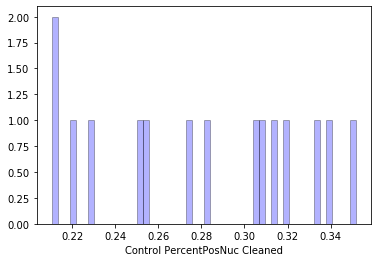

In [30]:
#histogram of Control Data with outliers removed
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
ax.hist(df_controls_RemOL['PercentPosNuc'],  color='blue', alpha=.3, edgecolor='black', bins=50)
ax.set(xlabel="Control PercentPosNuc Cleaned")

plt.show()

Do it for the rest

In [31]:
df_PGVG_RemOL = df_PGVG[df_PGVG['PercentPosNuc'].between(df_PGVG['PercentPosNuc'].quantile(.15), df_PGVG['PercentPosNuc'].quantile(.85))]
len(df_PGVG), len(df_PGVG_RemOL)

(20, 14)

In [32]:
df_PGVG_RemOL.to_csv('cleanedPGVG.csv')

In [33]:
df_Nic1_RemOL = df_Nic1[df_Nic1['PercentPosNuc'].between(df_Nic1['PercentPosNuc'].quantile(.15), df_Nic1['PercentPosNuc'].quantile(.85))]
len(df_Nic1), len(df_Nic1_RemOL)

(22, 14)

In [34]:
df_Nic1_RemOL.to_csv('cleanedNic1.csv')

In [35]:
df_Nic2_RemOL = df_Nic2[df_Nic2['PercentPosNuc'].between(df_Nic2['PercentPosNuc'].quantile(.15), df_Nic2['PercentPosNuc'].quantile(.85))]
len(df_Nic2), len(df_Nic2_RemOL)

(22, 15)

In [36]:
df_Nic2_RemOL.to_csv('cleanedNic2.csv')

In [37]:
df_Nic3_RemOL = df_Nic3[df_Nic3['PercentPosNuc'].between(df_Nic3['PercentPosNuc'].quantile(.15), df_Nic3['PercentPosNuc'].quantile(.85))]
len(df_Nic3), len(df_Nic3_RemOL)

(22, 14)

In [38]:
df_Nic3_RemOL.to_csv('cleanedNic3.csv')

In [39]:
df_CSE_RemOL = df_CSE[df_CSE['PercentPosNuc'].between(df_CSE['PercentPosNuc'].quantile(.15), df_CSE['PercentPosNuc'].quantile(.85))]
len(df_CSE), len(df_CSE_RemOL)

(26, 18)

In [40]:
df_CSE_RemOL.to_csv('cleanedCSE.csv')

In [41]:
df_controls_RemOL.to_csv('cleanedControls.csv')

# Look at distribution of cleaned data

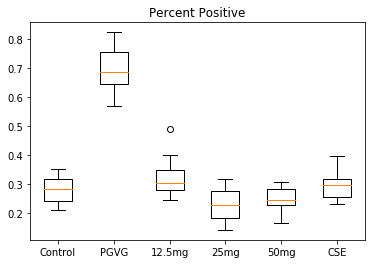

In [42]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
control_nuclei_count_bxplt = df_controls_RemOL.loc[(df_controls.PercentPosNuc.notnull()) ,'PercentPosNuc']
PGVG_nuclei_count_bxplt = df_PGVG_RemOL.loc[(df_PGVG.PercentPosNuc.notnull()) ,'PercentPosNuc']
Nic1_nuclei_count_bxplt = df_Nic1_RemOL.loc[(df_Nic1.PercentPosNuc.notnull()) ,'PercentPosNuc']
Nic2_nuclei_count_bxplt = df_Nic2_RemOL.loc[(df_Nic2.PercentPosNuc.notnull())  ,'PercentPosNuc']
Nic3_nuclei_count_bxplt = df_Nic3_RemOL.loc[(df_Nic3.PercentPosNuc.notnull())  ,'PercentPosNuc']
CSE_nuclei_count_bxplt = df_CSE_RemOL.loc[(df_CSE.PercentPosNuc.notnull())  ,'PercentPosNuc']
ax.boxplot([control_nuclei_count_bxplt, PGVG_nuclei_count_bxplt, Nic1_nuclei_count_bxplt, Nic2_nuclei_count_bxplt, Nic3_nuclei_count_bxplt, CSE_nuclei_count_bxplt])
ax.set(xticklabels = ['Control', 'PGVG', '12.5mg', '25mg', '50mg', 'CSE'], title="Percent Positive")
plt.show()

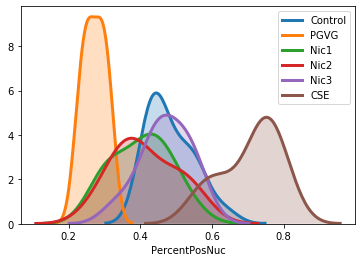

In [38]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df_controls_RemOL.loc[(df_controls_RemOL.PercentPosNuc.notnull()),'PercentPosNuc'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Control")
sns.distplot(df_PGVG_RemOL.loc[(df_PGVG_RemOL.PercentPosNuc.notnull()),'PercentPosNuc'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "PGVG")

sns.distplot(df_Nic1_RemOL.loc[(df_Nic1_RemOL.PercentPosNuc.notnull()),'PercentPosNuc'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Nic1")
sns.distplot(df_Nic2_RemOL.loc[(df_Nic2_RemOL.PercentPosNuc.notnull()),'PercentPosNuc'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Nic2")

sns.distplot(df_Nic3_RemOL.loc[(df_Nic3_RemOL.PercentPosNuc.notnull()),'PercentPosNuc'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Nic3")

sns.distplot(df_CSE_RemOL.loc[(df_CSE_RemOL.PercentPosNuc.notnull()),'PercentPosNuc'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "CSE")
